In [1]:
import pandas as pd
file_path = "/content/drive/MyDrive/추천시스템 입문반/data/ml-latest-small/attraction_list_top30_tags.csv"

#attraction_list Clustering

In [2]:
attraction = pd.read_csv(file_path)
attraction.head(2)

,Unnamed: 0,alltag,contentsid,title,address,roadaddress,tag,introduction,latitude,longitude,...,region1cd.label,region1cd.refId,region2cd.value,region2cd.label,region2cd.refId,repPhoto.descseo,repPhoto.photoid.photoid,repPhoto.photoid.imgpath,repPhoto.photoid.thumbnailpath,인기점수
0,0,"숲길,걷기/등산,친구,커플,흐림,봄,자연경관,도보여행,도보,숲,단풍,화장실,어려움",CONT_000000000500281,사려니숲길,제주특별자치도 제주시 조천읍 교래리 산 137-1,제주특별자치도 제주시 조천읍 교래리 산 137-1,"자연경관,친구,도보여행,도보,커플,봄,흐림,걷기/등산","제주 숨은 비경 31, 삼나무 향기에 취하며 걷는 아름답고 청정한 숲길",33.40845,126.63976,...,제주시,region>region1,15.0,조천,region1>15,Saryeoni Forest Path,18168.0,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,1276524.0
1,1,"섬속의섬,경관/포토,아이,맑음,자연경관,포토스팟,어린이,봄꽃,유채꽃,유네스코,공용주...",CONT_000000000500477,우도(해양도립공원),제주특별자치도 제주시 우도면 연평리 904-1,제주특별자치도 제주시 우도면 삼양고수물길 1,"자연경관,포토스팟,아이,어린이,맑음,경관/포토",소가 누워있는 형상을 하고 있는 제주의 가장 큰 부속섬,33.51949,126.95109,...,섬 속의 섬,region>region3,31.0,우도,region3>31,Udo Maritime Park,19203.0,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,1188600.0


In [3]:
tag_checker = attraction['tag'].str.get_dummies(sep=',')
tag_checker

,가을,걷기/등산,경관/포토,도보,도보여행,레저/체험,맑음,문화관광,문화유적지,봄,...,오름,자연경관,체험,친구,커플,포토스팟,해변,혼자,휴식/힐링,흐림
0,0,1,0,1,1,0,0,0,0,1,...,0,1,0,1,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1089,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,1,0,1,1,1
1090,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [6]:
corr = tag_checker.corr(method='pearson')
corr

,가을,걷기/등산,경관/포토,도보,도보여행,레저/체험,맑음,문화관광,문화유적지,봄,...,오름,자연경관,체험,친구,커플,포토스팟,해변,혼자,휴식/힐링,흐림
가을,1.000000,0.259795,-0.013147,0.218786,0.212711,-0.064440,0.031327,0.022939,-0.074168,0.281123,...,0.011009,0.052474,-0.127651,0.057368,-0.013376,0.000318,-0.008715,0.047937,-0.007737,0.112888
걷기/등산,0.259795,1.000000,-0.122446,0.568643,0.570675,-0.174502,-0.083600,-0.098665,-0.182900,0.285918,...,0.330462,0.317532,-0.205843,-0.007748,-0.187589,-0.130921,-0.096158,-0.027003,-0.094885,0.157403
경관/포토,-0.013147,-0.122446,1.000000,-0.061073,-0.060148,-0.083265,0.184571,-0.172366,-0.108831,0.039139,...,-0.030224,0.178311,-0.109217,0.100365,0.181614,0.958591,0.109932,0.102161,0.177167,-0.030483
도보,0.218786,0.568643,-0.061073,1.000000,0.997052,-0.152513,0.027948,-0.103001,-0.195716,0.261405,...,0.579877,0.345834,-0.152635,0.215214,0.054526,-0.066453,-0.166676,0.244814,-0.060685,0.073867
도보여행,0.212711,0.570675,-0.060148,0.997052,1.000000,-0.151842,0.024720,-0.102030,-0.195078,0.254927,...,0.581847,0.343879,-0.151571,0.212137,0.051367,-0.065500,-0.166056,0.239914,-0.059908,0.074819
레저/체험,-0.064440,-0.174502,-0.083265,-0.152513,-0.151842,1.000000,0.109525,-0.203081,-0.174502,-0.110412,...,-0.098704,-0.188285,0.707161,0.076992,0.095874,-0.092128,0.036084,-0.077457,-0.061541,-0.101461
맑음,0.031327,-0.083600,0.184571,0.027948,0.024720,0.109525,1.000000,-0.221925,-0.137221,0.059061,...,0.086108,0.223228,0.016049,0.219961,0.296956,0.192099,0.243541,0.146961,0.060834,-0.131357
문화관광,0.022939,-0.098665,-0.172366,-0.103001,-0.102030,-0.203081,-0.221925,1.000000,0.510353,0.016475,...,-0.181941,-0.290995,-0.228896,-0.199847,-0.190416,-0.157428,-0.157630,-0.135070,-0.093602,0.096664
문화유적지,-0.074168,-0.182900,-0.108831,-0.195716,-0.195078,-0.174502,-0.137221,0.510353,1.000000,-0.075772,...,-0.138168,-0.059085,-0.240918,-0.139049,-0.171535,-0.124271,0.088217,-0.068504,-0.102481,-0.020677
봄,0.281123,0.285918,0.039139,0.261405,0.254927,-0.110412,0.059061,0.016475,-0.075772,1.000000,...,-0.006199,0.084322,-0.143840,0.064975,-0.013738,0.045369,-0.079724,0.070558,-0.009028,0.115982


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_

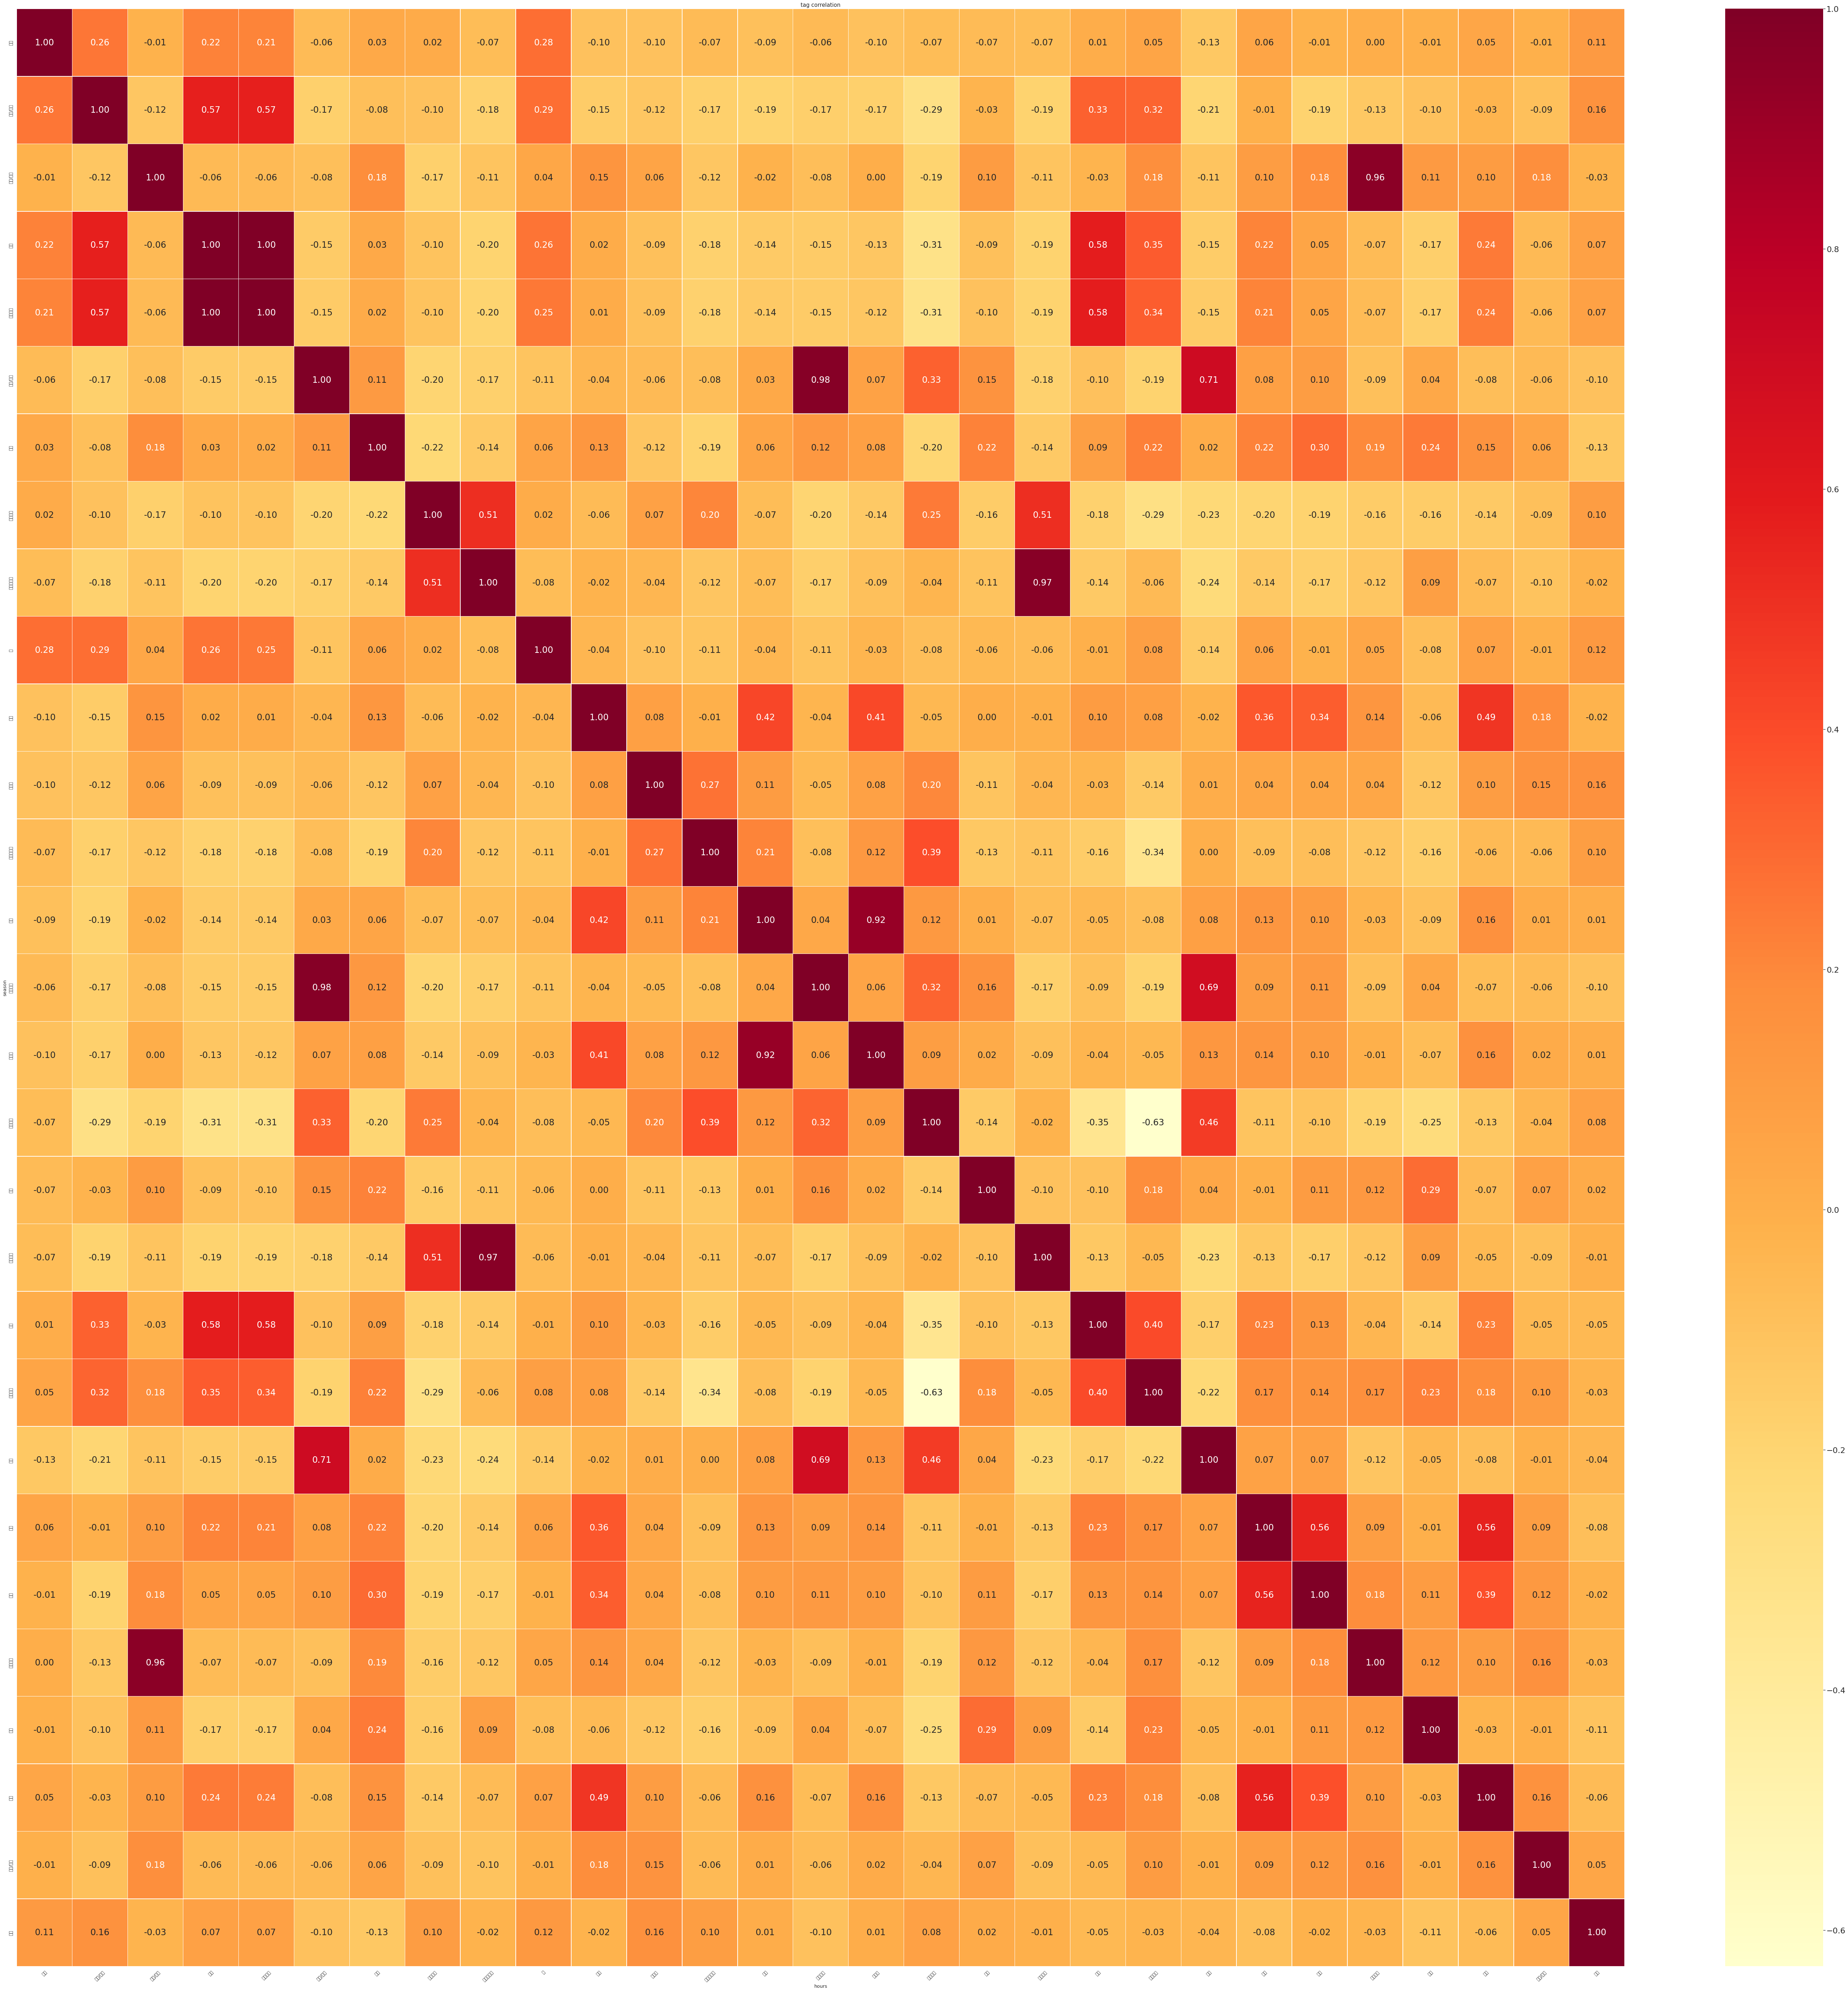

In [7]:
sns.set(font_scale=2.0) # 레이블의 폰트 사이즈를 조정


fig, ax = plt.subplots(figsize=(100,100))

sns.heatmap(corr, # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            fmt = '.2f', # 소수점 포맷팅 형태
            cmap = 'YlOrRd') # colormap 형태

plt.title('tag correlation', size = 15)
plt.ylabel('season', size = 13)
plt.xlabel('hours', size = 13) 

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show()


#클러스터링 적용

In [8]:
test_file_path = "/content/drive/MyDrive/추천시스템 입문반/data/ml-latest-small/save_top_70.csv"

In [9]:
import sklearn.cluster as cluster
import pandas as pd

In [10]:
tag_checker.describe()

,가을,걷기/등산,경관/포토,도보,도보여행,레저/체험,맑음,문화관광,문화유적지,봄,...,오름,자연경관,체험,친구,커플,포토스팟,해변,혼자,휴식/힐링,흐림
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.00000,...,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.00000
mean,0.114364,0.154620,0.165599,0.192132,0.191217,0.142726,0.334858,0.198536,0.154620,0.10064,...,0.133577,0.447392,0.249771,0.310156,0.337603,0.175663,0.136322,0.159195,0.127173,0.10979
std,0.318399,0.361708,0.371891,0.394156,0.393439,0.349954,0.472157,0.399081,0.361708,0.30099,...,0.340353,0.497452,0.433079,0.462769,0.473109,0.380708,0.343287,0.366025,0.333319,0.31277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [11]:
test_file = pd.read_csv(test_file_path,encoding='euc-kr')

In [12]:
test_file.drop(columns=['Unnamed: 0'],inplace=True)
test_file

,title,nature,outdoor,피로도,산-바다,도보산책,신나는,낮,인문학
0,사려니숲길,2.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0
1,우도(해양도립공원),3.0,3.0,3.0,1.0,3.0,0.0,3.0,0.0
2,성산일출봉(UNESCO 세계자연유산),3.0,3.0,3.0,0.0,3.0,0.0,3.0,1.0
3,비자림,2.0,3.0,3.0,1.0,3.0,0.0,3.0,0.0
4,천지연폭포,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
67,수월봉 지질트레일,3.0,3.0,2.0,2.0,3.0,0.0,3.0,1.0
68,제주하늘을날다(패러글라이딩),1.0,3.0,2.0,1.0,0.0,3.0,3.0,0.0
69,제주동백수목원,2.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0
70,생각하는정원,2.0,2.0,1.0,1.0,2.0,1.0,3.0,0.0


In [13]:
test_file.drop(index=71,inplace=True)
test_file

,title,nature,outdoor,피로도,산-바다,도보산책,신나는,낮,인문학
0,사려니숲길,2.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0
1,우도(해양도립공원),3.0,3.0,3.0,1.0,3.0,0.0,3.0,0.0
2,성산일출봉(UNESCO 세계자연유산),3.0,3.0,3.0,0.0,3.0,0.0,3.0,1.0
3,비자림,2.0,3.0,3.0,1.0,3.0,0.0,3.0,0.0
4,천지연폭포,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
66,환상숲 곶자왈공원,3.0,3.0,1.0,1.0,3.0,1.0,3.0,1.0
67,수월봉 지질트레일,3.0,3.0,2.0,2.0,3.0,0.0,3.0,1.0
68,제주하늘을날다(패러글라이딩),1.0,3.0,2.0,1.0,0.0,3.0,3.0,0.0
69,제주동백수목원,2.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0


In [14]:
test_file['인문학'] = test_file['인문학'].apply(lambda x: 2*x)

In [15]:
test_file.isnull().sum()

title      0
nature     0
outdoor    0
피로도        0
산-바다       0
도보산책       0
신나는        0
낮          0
인문학        0
dtype: int64

In [16]:
test_file['신나는'].fillna(0,inplace=True)
test_file.head(3)

,title,nature,outdoor,피로도,산-바다,도보산책,신나는,낮,인문학
0,사려니숲길,2.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0
1,우도(해양도립공원),3.0,3.0,3.0,1.0,3.0,0.0,3.0,0.0
2,성산일출봉(UNESCO 세계자연유산),3.0,3.0,3.0,0.0,3.0,0.0,3.0,2.0


In [17]:
test_file.iloc[6,7] = 2
test_file.iloc[6,7]

2.0

In [18]:
test_file_tag_list = ['nature', 'outdoor', '피로도', '산-바다', '도보산책', '신나는', '낮', '인문학']

In [19]:
kmeans = cluster.KMeans(n_clusters=10,init='k-means++')
kmeans = kmeans.fit(test_file[test_file_tag_list])

In [20]:
test_file['type'] = kmeans.labels_

In [21]:
test_file

,title,nature,outdoor,피로도,산-바다,도보산책,신나는,낮,인문학,type
0,사려니숲길,2.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0,6
1,우도(해양도립공원),3.0,3.0,3.0,1.0,3.0,0.0,3.0,0.0,0
2,성산일출봉(UNESCO 세계자연유산),3.0,3.0,3.0,0.0,3.0,0.0,3.0,2.0,5
3,비자림,2.0,3.0,3.0,1.0,3.0,0.0,3.0,0.0,0
4,천지연폭포,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...
66,환상숲 곶자왈공원,3.0,3.0,1.0,1.0,3.0,1.0,3.0,2.0,5
67,수월봉 지질트레일,3.0,3.0,2.0,2.0,3.0,0.0,3.0,2.0,5
68,제주하늘을날다(패러글라이딩),1.0,3.0,2.0,1.0,0.0,3.0,3.0,0.0,2
69,제주동백수목원,2.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,3


In [22]:
test_file.sort_values(by='type')

,title,nature,outdoor,피로도,산-바다,도보산책,신나는,낮,인문학,type
27,한림공원,3.0,3.0,2.0,0.0,3.0,0.0,2.0,0.0,0
1,우도(해양도립공원),3.0,3.0,3.0,1.0,3.0,0.0,3.0,0.0,0
3,비자림,2.0,3.0,3.0,1.0,3.0,0.0,3.0,0.0,0
20,산굼부리,3.0,3.0,3.0,0.0,3.0,0.0,3.0,0.0,0
50,서귀포치유의숲,3.0,3.0,1.0,1.0,3.0,0.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
44,세화해변,3.0,3.0,1.0,3.0,3.0,1.0,3.0,0.0,8
12,월정리해변,2.0,3.0,1.0,3.0,3.0,1.0,3.0,0.0,8
54,중문관광단지,1.0,1.0,1.0,2.0,1.0,3.0,2.0,0.0,9
53,렛츠런파크,0.0,1.0,1.0,1.0,0.0,3.0,2.0,0.0,9


In [24]:
test_file.groupby('type').mean()

,nature,outdoor,피로도,산-바다,도보산책,신나는,낮,인문학
type,,,,,,,,
0,2.857143,3.000000,2.428571,0.857143,2.857143,0.000000,2.857143,0.0
1,0.800000,1.000000,0.400000,1.600000,1.200000,0.600000,1.800000,0.0
2,1.428571,2.857143,1.571429,0.857143,0.428571,2.714286,3.000000,0.0
3,2.000000,2.750000,1.000000,1.416667,2.500000,0.916667,2.833333,0.0
4,0.800000,1.200000,1.200000,1.000000,1.000000,1.000000,2.400000,5.2
5,2.769231,3.000000,2.384615,0.384615,2.692308,0.076923,2.846154,2.0
6,2.666667,2.666667,1.000000,1.000000,1.666667,0.333333,0.000000,0.0
7,3.000000,2.666667,0.833333,2.000000,1.333333,0.000000,2.833333,2.0
8,2.300000,3.000000,1.800000,2.800000,2.800000,1.700000,3.000000,0.0


In [27]:
from sklearn.metrics.pairwise import pairwise_distances

In [30]:
row_similarity = pairwise_distances(test_file.groupby('type').mean(),metric='cosine')

In [37]:
for i, group in enumerate(row_similarity):
  print('group %d : '%i,end=' ')
  for val in group:
    print("%.2f "%(val),end=' ')
  print()

group 0 :  0.00  0.17  0.22  0.05  0.51  0.05  0.15  0.14  0.09  0.49  
group 1 :  0.17  0.00  0.19  0.06  0.48  0.23  0.33  0.15  0.04  0.25  
group 2 :  0.22  0.19  0.00  0.14  0.49  0.25  0.35  0.25  0.13  0.13  
group 3 :  0.05  0.06  0.14  0.00  0.48  0.10  0.18  0.12  0.03  0.34  
group 4 :  0.51  0.48  0.49  0.48  0.00  0.28  0.65  0.26  0.48  0.54  
group 5 :  0.05  0.23  0.25  0.10  0.28  0.00  0.20  0.09  0.15  0.52  
group 6 :  0.15  0.33  0.35  0.18  0.65  0.20  0.00  0.22  0.18  0.63  
group 7 :  0.14  0.15  0.25  0.12  0.26  0.09  0.22  0.00  0.13  0.48  
group 8 :  0.09  0.04  0.13  0.03  0.48  0.15  0.18  0.13  0.00  0.25  
group 9 :  0.49  0.25  0.13  0.34  0.54  0.52  0.63  0.48  0.25  0.00  


In [38]:
test_file['type'].value_counts(sort = True)

5    13
3    12
8    10
0     7
2     7
7     6
1     5
4     5
6     3
9     3
Name: type, dtype: int64

In [ ]:
tag_list = list(tag_checker.columns)
tag_list

['가을',
 '걷기/등산',
 '경관/포토',
 '도보',
 '도보여행',
 '레저/체험',
 '맑음',
 '문화관광',
 '문화유적지',
 '봄',
 '부모',
 '사계절',
 '실내관광지',
 '아이',
 '액티비티',
 '어린이',
 '어트랙션',
 '여름',
 '역사유적',
 '오름',
 '자연경관',
 '체험',
 '친구',
 '커플',
 '포토스팟',
 '해변',
 '혼자',
 '휴식/힐링',
 '흐림']

In [ ]:
kmeans = cluster.KMeans(n_clusters=20,init='k-means++')
kmeans = kmeans.fit(tag_checker[tag_list])

In [ ]:
tag_checker['type'] = kmeans.labels_

In [ ]:
tag_checker['type']

0       12
1       16
2       16
3        7
4       16
        ..
1088    10
1089    11
1090     7
1091     7
1092    13
Name: type, Length: 1093, dtype: int32

In [ ]:
tag_checker['type'].value_counts()

10    94
7     92
13    88
2     84
4     82
15    75
0     68
16    64
8     56
5     53
17    47
9     46
6     45
18    41
14    37
12    30
11    30
3     23
1     19
19    19
Name: type, dtype: int64

##나눈 그룹을 기존의 DataFrame과 병합하기

In [ ]:
attraction_list = attraction
attraction_list

,Unnamed: 0,alltag,contentsid,title,address,roadaddress,tag,introduction,latitude,longitude,...,region1cd.refId,region2cd.value,region2cd.label,region2cd.refId,repPhoto.descseo,repPhoto.photoid.photoid,repPhoto.photoid.imgpath,repPhoto.photoid.thumbnailpath,인기점수,type
0,0,"숲길,걷기/등산,친구,커플,흐림,봄,자연경관,도보여행,도보,숲,단풍,화장실,어려움",CONT_000000000500281,사려니숲길,제주특별자치도 제주시 조천읍 교래리 산 137-1,제주특별자치도 제주시 조천읍 교래리 산 137-1,"자연경관,친구,도보여행,도보,커플,봄,흐림,걷기/등산","제주 숨은 비경 31, 삼나무 향기에 취하며 걷는 아름답고 청정한 숲길",33.408450,126.639760,...,region>region1,15.0,조천,region1>15,Saryeoni Forest Path,1.816800e+04,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,1276524.0,4
1,1,"섬속의섬,경관/포토,아이,맑음,자연경관,포토스팟,어린이,봄꽃,유채꽃,유네스코,공용주...",CONT_000000000500477,우도(해양도립공원),제주특별자치도 제주시 우도면 연평리 904-1,제주특별자치도 제주시 우도면 삼양고수물길 1,"자연경관,포토스팟,아이,어린이,맑음,경관/포토",소가 누워있는 형상을 하고 있는 제주의 가장 큰 부속섬,33.519490,126.951090,...,region>region3,31.0,우도,region3>31,Udo Maritime Park,1.920300e+04,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,1188600.0,5
2,2,"일출,오름,경관/포토,부모,자연경관,포토스팟,유네스코,공용주차장,현금결제,카드결제,...",CONT_000000000500349,성산일출봉(UNESCO 세계자연유산),제주특별자치도 서귀포시 성산읍 성산리 1,제주특별자치도 서귀포시 성산읍 일출로 284-12,"부모,자연경관,포토스팟,경관/포토,오름","바다위에 우뚝 솟아난 수성화산·유네스코 세계자연유산, 천연기념물 제420호, 올레1코스",33.462147,126.936424,...,region>region2,17.0,성산,region2>17,성산일출봉(UNESCO 세계자연유산),2.018052e+12,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,1027366.0,5
3,3,"걷기/등산,아이,흐림,여름,힐링,자연경관,어린이,수국,공용주차장,현금결제,카드결제,...",CONT_000000000500270,비자림,제주특별자치도 제주시 구좌읍 평대리 3161-1,제주특별자치도 제주시 구좌읍 비자숲길 55,"자연경관,아이,어린이,여름,흐림,걷기/등산",천년의 세월이 녹아든 신비로움 가득한 비자림은 500~800년생 비자나무들이 자생하...,33.491318,126.811386,...,region>region1,16.0,구좌,region1>16,비자림,2.019023e+12,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,916549.0,1
4,4,"폭포, 밤, 경관/포토, 부모, 맑음, 여름,공용주차장,현금결제,카드결제,화장실,음...",CONT_000000000500618,천지연폭포,제주특별자치도 서귀포시 서홍동 666-1,제주특별자치도 서귀포시 남성중로 2-15,"부모,자연경관,포토스팟,여름,맑음,경관/포토","하늘과 땅이 만나서 이룬 연못, \r\n· 천연기념물 제163호\r\n· 천연기념물...",33.244717,126.559820,...,region>region2,21.0,서귀포시내,region2>21,천지연폭포,2.019023e+12,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,645261.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1088,"테마공원,경관/포토,문화유적지,역사유적,포토스팟,어트랙션,쉬움",CNTS_200000000012073,영등할망 신화공원,제주 제주시 한림읍 귀덕11길 19,제주 제주시 한림읍 귀덕11길 19,"포토스팟,역사유적,어트랙션,경관/포토,문화유적지",영등할망신화공원은 귀덕포구에서 해변을 따라 현무암으로 만들어진 좁은 돌길을 따라 약...,NaN,NaN,...,region>region1,13.0,한림,region1>13,영등할망 신화공원,2.019023e+12,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,411.0,2
1089,1089,"커플,부모,혼자,친구,아이,맑음,흐림,비.눈,경관/포토,휴식/힐링,미술/박물관,사계...",CNTS_200000000012075,헌마공신김만일기념관,서귀포시 남원읍 서성로 919,서귀포시 남원읍 서성로 919,"부모,포토스팟,실내관광지,역사유적,친구,아이,휴식/힐링,어린이,커플,어트랙션,맑음,...",임진왜란 당시 전쟁에 사용할 말 500마리를 헌납하면서 국난극복에 기여한 김만일(1...,NaN,NaN,...,region>region2,25.0,남원,region2>25,헌마공신김만일기념관,2.019023e+12,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,287.0,8
1090,1090,"문화관광, 건축문화기행,공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,카...",CNTS_200000000013150,훈데르트바서파크,제주특별자치도 제주시 우도면 연평리 1706-1,제주특별자치도 제주시 우도면 우도해안길 32-12,"문화관광,포토스팟","오스트리아 3대 화가이자 환경 운동가, 건축 치료사 ‘훈데르트바서' 의 예술과 건축...",33.493198,126.956206,...,region>region3,31.0,우도,region3>31,훈데르트바서파크,2.019023e+12,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,166.0,0
1091,1091,"기념품, 소품, 잡화, 선물,공용주차장",CNTS_200000000012670,세화소품관,제주특별자치도 제주시 구좌읍 세화리 1500-6,제주특별자치도 제주시 구좌읍 해맞이해안로 1422-3,NaN,"세화 해수욕장 인근에 위치한 세화소품관은 악세서리, 엽서, 필통, 파우치, 캔들, ...",33.525585,126.857703,...,region>region1,16.0,구좌,region1>16,세화소품관,2.019023e+12,https://api.cdn.visitjeju.net/photomng/imgpath...,https://api.cdn.visitjeju.net/photomng/thumbna...,60.0,1
